### TERM INSURANCE CUSTOMER PREDICTION :

#### Import Necessary Libraries :

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Read File :

In [2]:
df = pd.read_csv(r"G:\Imarticus LMS\Decision Tree And Random Forest In Python\Insurance_Marketing.csv")

#### Display all rows and columns :

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [5]:
df.head()

,Age,Job,Marital,Qualification,Default_Premium,Health_Insurance,General_Insurance,Contact,Month,Last_Contact_Day,Last_Contact_Duration,Contacts_During_Campaign,Previous_Contact_Days,Contacts_Before_Campaign,Previous_Outcome,Employement_Rates,Price_Variation,Consumer_Confidence_Index,Insurance_Rate,No_Employees,Client_Subscribed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,94.159686,-38.173679,3.543298,5074.493963,0
1,57,7,1,1,1,0,0,1,6,1,149,1,999,0,1,1.1,93.374479,-33.312428,6.013585,5125.221264,0
2,37,7,1,1,0,2,0,1,6,1,226,1,999,0,1,1.1,94.100629,-51.947349,2.784063,5205.455324,0
3,40,0,1,0,0,0,0,1,6,1,151,1,999,0,1,1.1,92.772613,-35.624584,4.459237,5096.139930,0
4,56,7,1,1,0,0,2,1,6,1,307,1,999,0,1,1.1,93.241248,-33.492147,3.988744,5112.681264,0


####  Get the number of Rows and Columns :


In [6]:
df.shape

(41188, 21)

#### Check for any misssing null values in the data :

In [7]:
df.isna().sum()

Age                          0
Job                          0
Marital                      0
Qualification                0
Default_Premium              0
Health_Insurance             0
General_Insurance            0
Contact                      0
Month                        0
Last_Contact_Day             0
Last_Contact_Duration        0
Contacts_During_Campaign     0
Previous_Contact_Days        0
Contacts_Before_Campaign     0
Previous_Outcome             0
Employement_Rates            0
Price_Variation              0
Consumer_Confidence_Index    0
Insurance_Rate               0
No_Employees                 0
Client_Subscribed            0
dtype: int64

#### Display Column Names :

In [8]:
df.columns

Index(['Age', 'Job', 'Marital', 'Qualification', 'Default_Premium',
       'Health_Insurance', 'General_Insurance', 'Contact', 'Month',
       'Last_Contact_Day', 'Last_Contact_Duration', 'Contacts_During_Campaign',
       'Previous_Contact_Days', 'Contacts_Before_Campaign', 'Previous_Outcome',
       'Employement_Rates', 'Price_Variation', 'Consumer_Confidence_Index',
       'Insurance_Rate', 'No_Employees', 'Client_Subscribed'],
      dtype='object')

#### Ckeck Correlation :

In [9]:
df.corr()

,Age,Job,Marital,Qualification,Default_Premium,Health_Insurance,General_Insurance,Contact,Month,Last_Contact_Day,Last_Contact_Duration,Contacts_During_Campaign,Previous_Contact_Days,Contacts_Before_Campaign,Previous_Outcome,Employement_Rates,Price_Variation,Consumer_Confidence_Index,Insurance_Rate,No_Employees,Client_Subscribed
Age,1.000000,0.001250,-0.389753,-0.057766,0.164965,-0.001603,-0.007368,0.007021,-0.024877,-0.017572,-0.000866,0.004594,-0.034369,0.024365,0.019750,-0.000371,0.006562,0.000074,-0.005903,-0.001038,0.030399
Job,0.001250,1.000000,0.027897,0.118668,-0.028277,0.006962,-0.010209,-0.025132,-0.033213,-0.000844,-0.006490,-0.006923,-0.028468,0.020965,0.011504,-0.008271,0.005623,0.001747,0.006183,0.001640,0.025122
Marital,-0.389753,0.027897,1.000000,0.093078,-0.079450,0.010467,0.005788,-0.054501,-0.007629,0.002202,0.010290,-0.007240,-0.037942,0.038689,0.001912,-0.084210,0.008624,0.006011,0.006604,-0.003893,0.046203
Qualification,-0.057766,0.118668,0.093078,1.000000,-0.157205,0.015110,0.007039,-0.104552,-0.091951,-0.015212,-0.014593,0.001683,-0.051286,0.038081,0.024687,-0.040076,-0.000087,0.007269,-0.003019,-0.004587,0.063032
Default_Premium,0.164965,-0.028277,-0.079450,-0.157205,1.000000,-0.015815,-0.003782,0.135238,-0.015830,-0.008701,-0.011794,0.032825,0.080062,-0.102416,0.023417,0.203263,0.004675,-0.000145,0.002874,-0.000482,-0.099352
Health_Insurance,-0.001603,0.006962,0.010467,0.015110,-0.015815,1.000000,0.044296,-0.082186,-0.018141,0.003339,-0.007658,-0.011010,-0.010551,0.021314,-0.011783,-0.060196,-0.000129,-0.002241,0.005434,-0.006501,0.011552
General_Insurance,-0.007368,-0.010209,0.005788,0.007039,-0.003782,0.044296,1.000000,-0.008556,-0.005705,-0.009344,-0.000916,0.005166,0.000345,-0.001327,-0.001511,0.001849,0.005772,0.005350,0.002079,-0.011285,-0.004909
Contact,0.007021,-0.025132,-0.054501,-0.104552,0.135238,-0.082186,-0.008556,1.000000,0.276565,-0.009575,-0.026657,0.077368,0.117970,-0.212848,0.118744,0.393584,0.002261,-0.005934,0.002565,0.002201,-0.144773
Month,-0.024877,-0.033213,-0.007629,-0.091951,-0.015830,-0.018141,-0.005705,0.276565,1.000000,0.027677,0.003690,-0.062059,-0.047891,0.103157,-0.065012,-0.178782,-0.000674,-0.003334,0.007926,0.007165,-0.006065
Last_Contact_Day,-0.017572,-0.000844,0.002202,-0.015212,-0.008701,0.003339,-0.009344,-0.009575,0.027677,1.000000,0.021950,-0.038288,-0.009531,-0.004102,0.018732,0.033245,0.001714,0.006039,0.005699,0.010741,0.015967


#### Visualise Correlation Using Heatmap :

<AxesSubplot:>

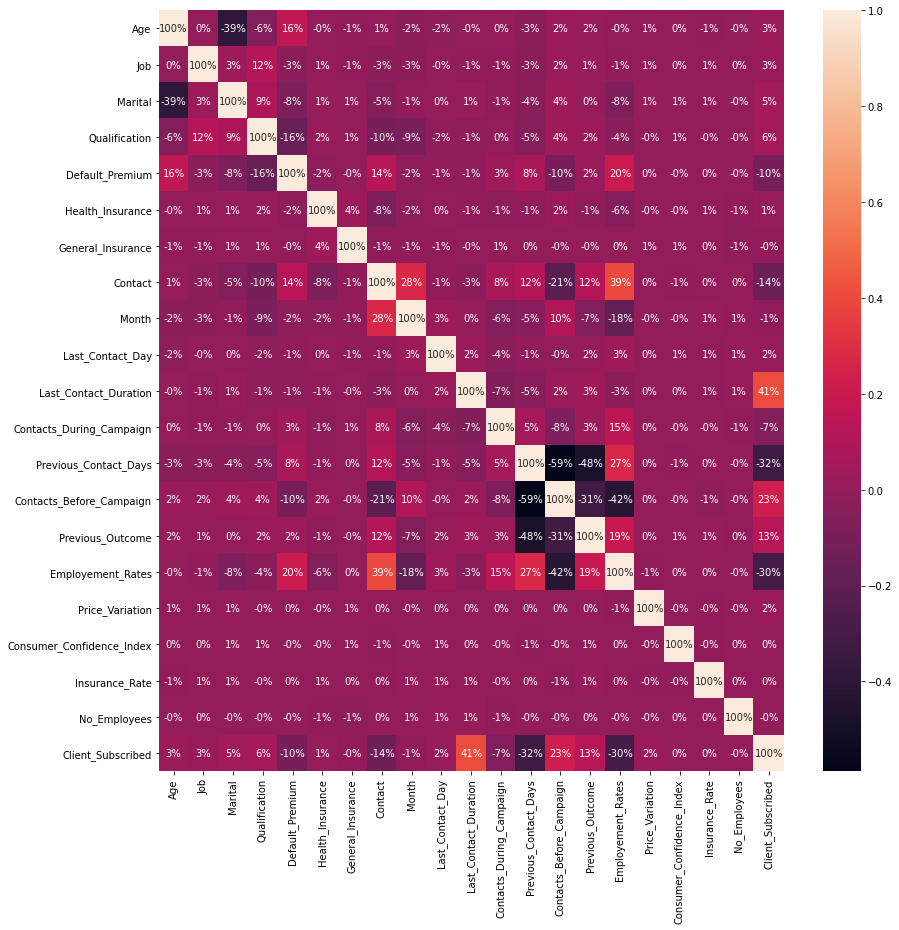

In [10]:
plt.figure(figsize = (14,14))
sns.heatmap(df.corr() , annot = True , fmt = '.0%')

### Visualise each column(Independent Variables and Dependent Variable) using CounterPlot :

<AxesSubplot:xlabel='Job', ylabel='count'>

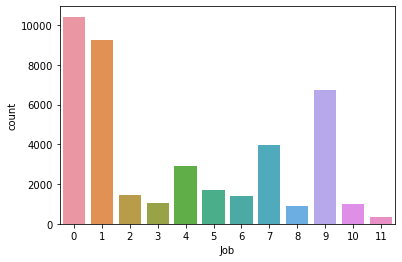

In [11]:
sns.countplot(x="Job",data=df)


<AxesSubplot:xlabel='Marital', ylabel='count'>

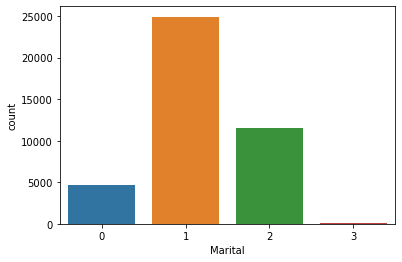

In [12]:
sns.countplot(x="Marital",data=df)


<AxesSubplot:xlabel='Qualification', ylabel='count'>

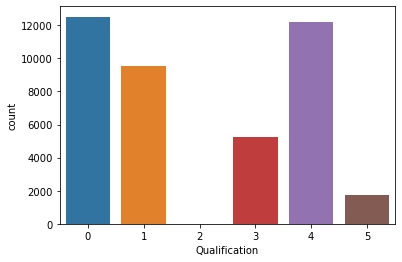

In [13]:
sns.countplot(x="Qualification",data=df)


<AxesSubplot:xlabel='Default_Premium', ylabel='count'>

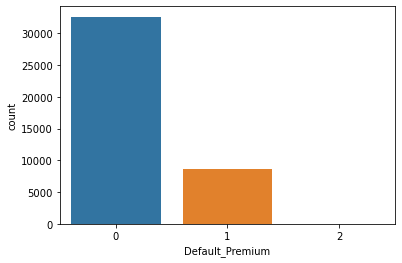

In [14]:
sns.countplot(x="Default_Premium",data=df)


<AxesSubplot:xlabel='Health_Insurance', ylabel='count'>

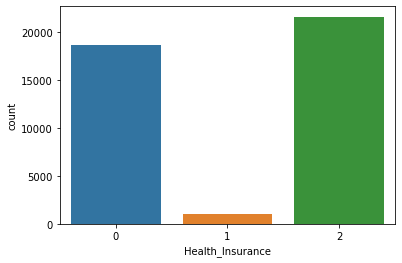

In [15]:
sns.countplot(x="Health_Insurance",data=df)


<AxesSubplot:xlabel='General_Insurance', ylabel='count'>

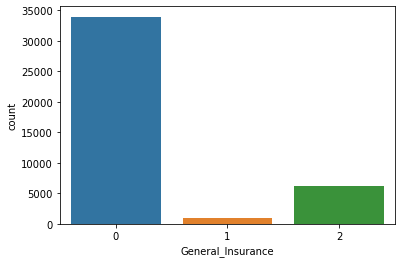

In [16]:
sns.countplot(x="General_Insurance",data=df)


<AxesSubplot:xlabel='Contact', ylabel='count'>

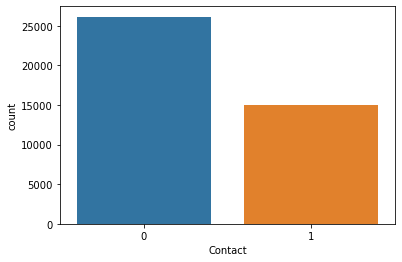

In [17]:
sns.countplot(x="Contact",data=df)


<AxesSubplot:xlabel='Month', ylabel='count'>

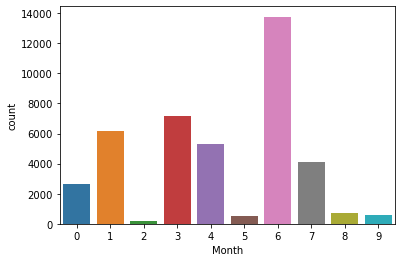

In [18]:
sns.countplot(x="Month",data=df)


<AxesSubplot:xlabel='Last_Contact_Day', ylabel='count'>

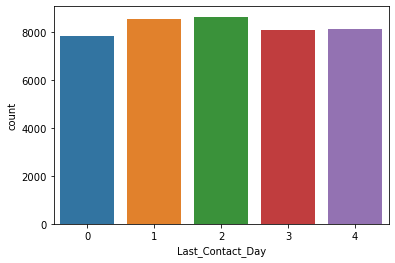

In [19]:
sns.countplot(x="Last_Contact_Day",data=df)


<AxesSubplot:xlabel='Contacts_Before_Campaign', ylabel='count'>

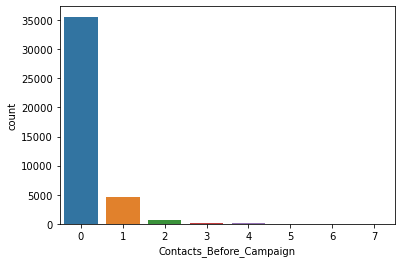

In [22]:
sns.countplot(x="Contacts_Before_Campaign",data=df)


<AxesSubplot:xlabel='Previous_Outcome', ylabel='count'>

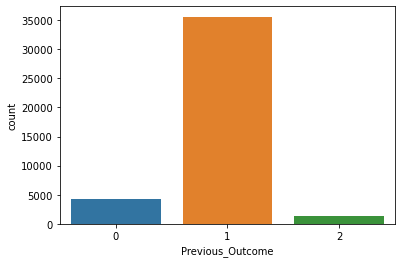

In [23]:
sns.countplot(x="Previous_Outcome",data=df)


<AxesSubplot:xlabel='Employement_Rates', ylabel='count'>

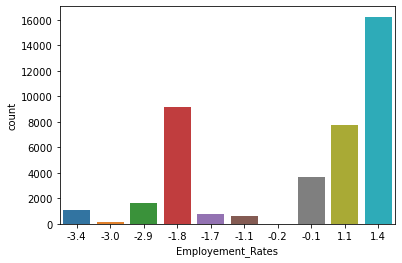

In [24]:
sns.countplot(x="Employement_Rates",data=df)


<AxesSubplot:xlabel='Client_Subscribed', ylabel='count'>

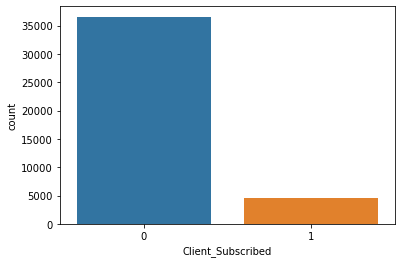

In [25]:
sns.countplot(x="Client_Subscribed",data=df)


### Compare Independent Varibles(Columns) with Dependent Variable(Column) :

<AxesSubplot:xlabel='Client_Subscribed', ylabel='count'>

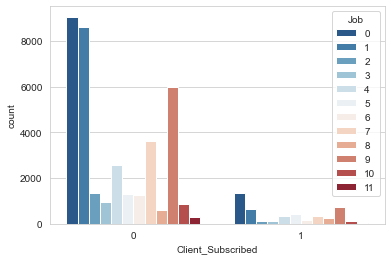

In [27]:
sns.set_style("whitegrid")
sns.countplot(x = "Client_Subscribed",hue = "Job", data=df,palette = 'RdBu_r')

<AxesSubplot:xlabel='Client_Subscribed', ylabel='count'>

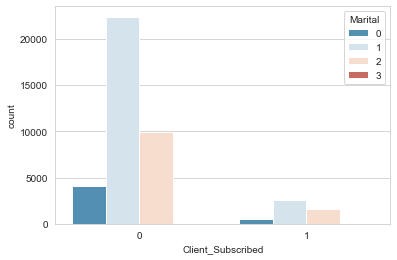

In [28]:
sns.set_style("whitegrid")
sns.countplot(x = "Client_Subscribed",hue = "Marital", data=df,palette = 'RdBu_r')

<AxesSubplot:xlabel='Client_Subscribed', ylabel='count'>

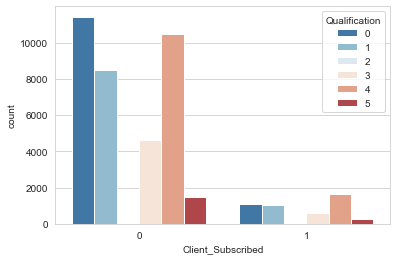

In [29]:
sns.set_style("whitegrid")
sns.countplot(x = "Client_Subscribed",hue = "Qualification", data=df,palette = 'RdBu_r')

<AxesSubplot:xlabel='Client_Subscribed', ylabel='count'>

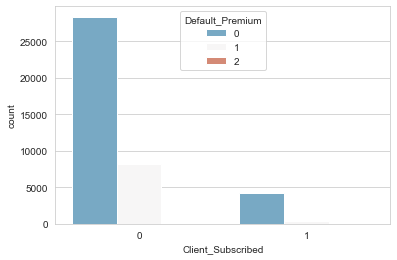

In [30]:
sns.set_style("whitegrid")
sns.countplot(x = "Client_Subscribed",hue = "Default_Premium", data=df,palette = 'RdBu_r')

<AxesSubplot:xlabel='Client_Subscribed', ylabel='count'>

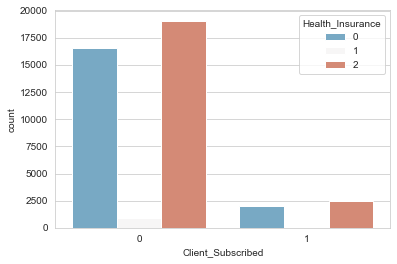

In [31]:
sns.set_style("whitegrid")
sns.countplot(x = "Client_Subscribed",hue = "Health_Insurance", data=df,palette = 'RdBu_r')

<AxesSubplot:xlabel='Client_Subscribed', ylabel='count'>

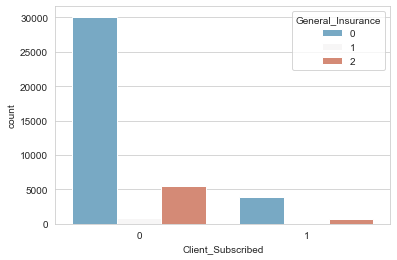

In [32]:
sns.set_style("whitegrid")
sns.countplot(x = "Client_Subscribed",hue = "General_Insurance", data=df,palette = 'RdBu_r')

<AxesSubplot:xlabel='Client_Subscribed', ylabel='count'>

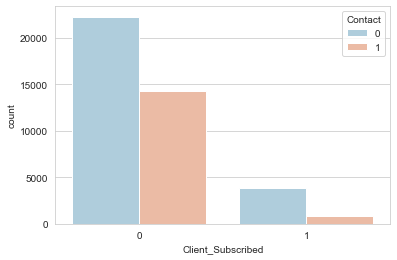

In [33]:
sns.set_style("whitegrid")
sns.countplot(x = "Client_Subscribed",hue = "Contact", data=df,palette = 'RdBu_r')

<AxesSubplot:xlabel='Client_Subscribed', ylabel='count'>

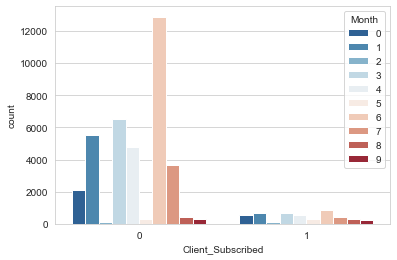

In [34]:
sns.set_style("whitegrid")
sns.countplot(x = "Client_Subscribed",hue = "Month", data=df,palette = 'RdBu_r')

<AxesSubplot:xlabel='Client_Subscribed', ylabel='count'>

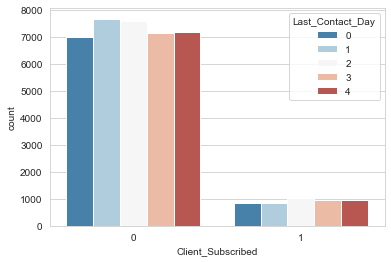

In [35]:
sns.set_style("whitegrid")
sns.countplot(x = "Client_Subscribed",hue = "Last_Contact_Day", data=df,palette = 'RdBu_r')

<AxesSubplot:xlabel='Client_Subscribed', ylabel='count'>

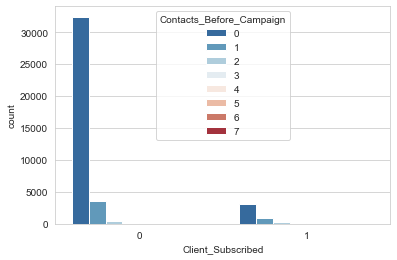

In [37]:
sns.set_style("whitegrid")
sns.countplot(x = "Client_Subscribed",hue = "Contacts_Before_Campaign", data=df,palette = 'RdBu_r')

<AxesSubplot:xlabel='Client_Subscribed', ylabel='count'>

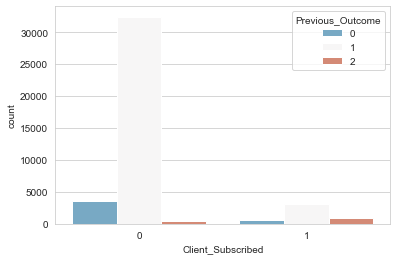

In [38]:
sns.set_style("whitegrid")
sns.countplot(x = "Client_Subscribed",hue = "Previous_Outcome", data=df,palette = 'RdBu_r')

<AxesSubplot:xlabel='Client_Subscribed', ylabel='count'>

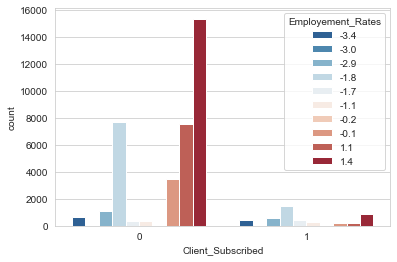

In [39]:
sns.set_style("whitegrid")
sns.countplot(x = "Client_Subscribed",hue = "Employement_Rates", data=df,palette = 'RdBu_r')

# .....................................END......................................................